# 05 NEU: Daten kategorisieren

Was ich hier vorhabe:
* Datensatz (von Doppel bereinigt) laden
* Kader einteilen
* Prozent m/w pro Direktion & Prozent Kader m/w pro Direktion plotten

In [4]:
# Sachen importieren

import pandas as pd
import re
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [34]:
# DataFrame laden

df = pd.read_csv('Verzeichnis_cut.csv')

df.head()


,Name,Gender,Email,Direktion,Sektion,Abteilung,Funktion
0,Abeztout Abderrahim,Herr,abderrahim.abeztout@fr.ch,"Raumplanungs-, Umwelt- und Baudirektion",RUBD - Hochbauamt,Technische Abteilung,Architektin
1,Ackermann Christophe,Herr,christophe.ackermann@fr.ch,Finanzdirektion,FIND - Finanzinspektorat,Finanzinspektorat,Adjunkt der Dienstchefin
2,Ackermann Urs,Herr,urs.ackermann@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für institutionelle Angelegenheiten...,Abteilung Institutionen und Rechtsangelenheiten,Höherer Verwaltungssachbearbeiter
3,Adam Samuel,Herr,NaN,Direktion für Gesundheit und Soziales,GSD - Kantonsarztamt,Kantonsarztamt,Adjunkt des Dienstchefs
4,Aebischer Adrian,Herr,adrian.aebischer@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für Wald und Natur,"Sektor Faune, Biodiversität, Jagd und Fischerei",Wissenschaftlicher Mitarbeiter Waldbiodiversität


## Kader einteilen
### Regex Begriffe testen

In [35]:
# Liste der Suchbegriffe, mit denen ich eine neue Spalte "Kader" anlegen will

overhead = ['chef', 'Vorsteher', 'Staatsrat', 'Staatsrätin', 
            'leiter', 'Verantwortliche', 'Direktor', 'Oberamtmann']

In [36]:
# Test für "chef"

r_chef = r"\w*chef\w*"
re.search(r_chef, "Adjunkt der Dienstchefin")

<re.Match object; span=(12, 24), match='Dienstchefin'>

In [37]:
# Das schlägt an. 
# im Beispiel unten jedoch nicht. -> funktioniert. =)

re.search(r_chef, "Höherer Verwaltungssachbearbeiter")

In [38]:
# Weitere Begriffe formatieren:

r_test = r"\w*beramtmann"
re.search(r_test, "Vizeoberamtmann")


<re.Match object; span=(0, 15), match='Vizeoberamtmann'>

### Neue Spalte mit Regex-Suche

In [39]:
# so, jetzt die gewünschten Begriffe auf einmal suchen:

searchfor = [r"\w*chef\w*", r"Vorsteher\w*", r"Staatsr\wt\w*", r"\w*leiter\S*", 
            r"\w*erantwortliche\w*", "\w*irektor\w*", r"\w*beramtmann"]

df['Kader'] = df['Funktion'].str.contains('|'.join(searchfor))

In [40]:
# Tadaaa:

df.head()

,Name,Gender,Email,Direktion,Sektion,Abteilung,Funktion,Kader
0,Abeztout Abderrahim,Herr,abderrahim.abeztout@fr.ch,"Raumplanungs-, Umwelt- und Baudirektion",RUBD - Hochbauamt,Technische Abteilung,Architektin,False
1,Ackermann Christophe,Herr,christophe.ackermann@fr.ch,Finanzdirektion,FIND - Finanzinspektorat,Finanzinspektorat,Adjunkt der Dienstchefin,True
2,Ackermann Urs,Herr,urs.ackermann@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für institutionelle Angelegenheiten...,Abteilung Institutionen und Rechtsangelenheiten,Höherer Verwaltungssachbearbeiter,False
3,Adam Samuel,Herr,NaN,Direktion für Gesundheit und Soziales,GSD - Kantonsarztamt,Kantonsarztamt,Adjunkt des Dienstchefs,True
4,Aebischer Adrian,Herr,adrian.aebischer@fr.ch,Direktion der Institutionen und der Land- und ...,ILFD - Amt für Wald und Natur,"Sektor Faune, Biodiversität, Jagd und Fischerei",Wissenschaftlicher Mitarbeiter Waldbiodiversität,False


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Name         1503 non-null object
Gender       1502 non-null object
Email        1152 non-null object
Direktion    1501 non-null object
Sektion      1501 non-null object
Abteilung    1501 non-null object
Funktion     1501 non-null object
Kader        1501 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


## Geschlechterverhältnis plotten


Mich interessiert: 
* Verhältins Mann Frau nach Direktion
* Prozent Verhältnis Mann Frau nach Direktion

Und dann das selbe fürs Kader.

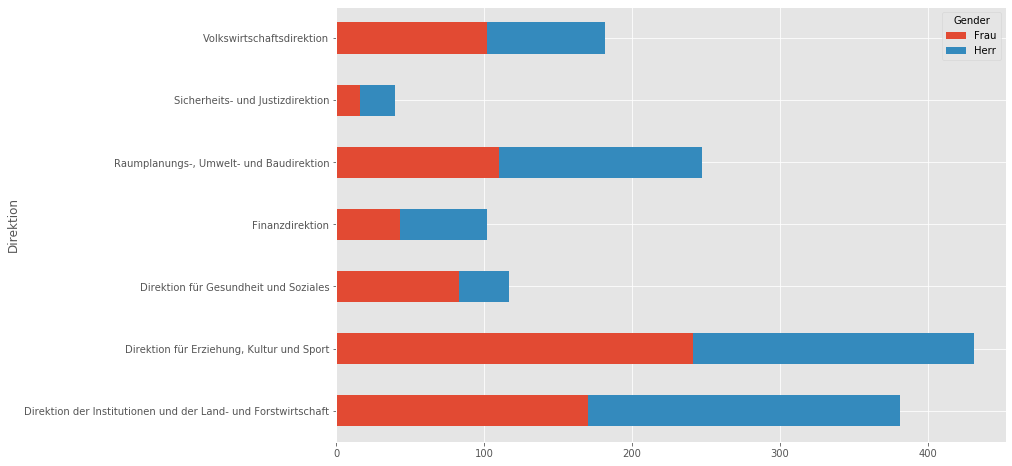

In [12]:
# Chart mit absoluten Werten nach Direktion und Geschlecht:

df.groupby('Direktion')['Gender'].value_counts().unstack().plot(kind='barh', stacked='True', figsize=(12, 8))


In [61]:
df.groupby('Direktion')['Gender'].value_counts().unstack()#.plot(kind='barh', stacked='True', figsize=(12, 8))

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,170,211
"Direktion für Erziehung, Kultur und Sport",241,190
Direktion für Gesundheit und Soziales,83,34
Finanzdirektion,43,59
"Raumplanungs-, Umwelt- und Baudirektion",110,137
Sicherheits- und Justizdirektion,16,24
Volkswirtschaftsdirektion,102,80


### Prozent ausrechnen.

In [69]:
# Zuerst die absoluten Zahlen

df['Gender'].value_counts()

Frau    767
Herr    735
Name: Gender, dtype: int64

In [13]:
# Was geht:

df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100


Frau    51.065246
Herr    48.934754
Name: Gender, dtype: float64

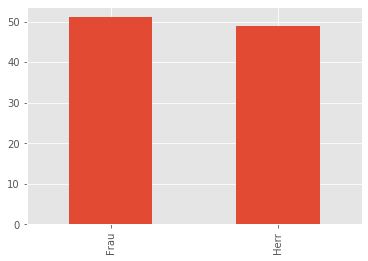

In [14]:
# Prozent aller Angestellten nach m/w

(df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100).plot(kind='bar')

In [ ]:
# Das hier gibt zwar keinen Fehler, aber stimmt nicht: 

(df.groupby('Direktion')['Gender'].value_counts() / df['Direktion'].value_counts().sum())*100

    # Input von Stack Overflow: 

    df_t = pd.DataFrame({'state': ['CA', 'WA', 'CO', 'AZ'] * 3,
                       'office_id': list(range(1, 7)) * 2,
                       'sales': [np.random.randint(100000, 999999)
                                 for _ in range(12)]})

    state_office = df_t.groupby(['state', 'office_id']).agg({'sales': 'sum'})
    # Change: groupby state_office and divide by sum
    state_pcts = state_office.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    #state_pcts
    state_office

In [63]:
# Prozent berechnen 

direktion_gender = df.groupby('Direktion')['Gender'].value_counts()
direktion_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,44.619423,55.380577
"Direktion für Erziehung, Kultur und Sport",55.916473,44.083527
Direktion für Gesundheit und Soziales,70.940171,29.059829
Finanzdirektion,42.156863,57.843137
"Raumplanungs-, Umwelt- und Baudirektion",44.534413,55.465587
Sicherheits- und Justizdirektion,40.000000,60.000000
Volkswirtschaftsdirektion,56.043956,43.956044


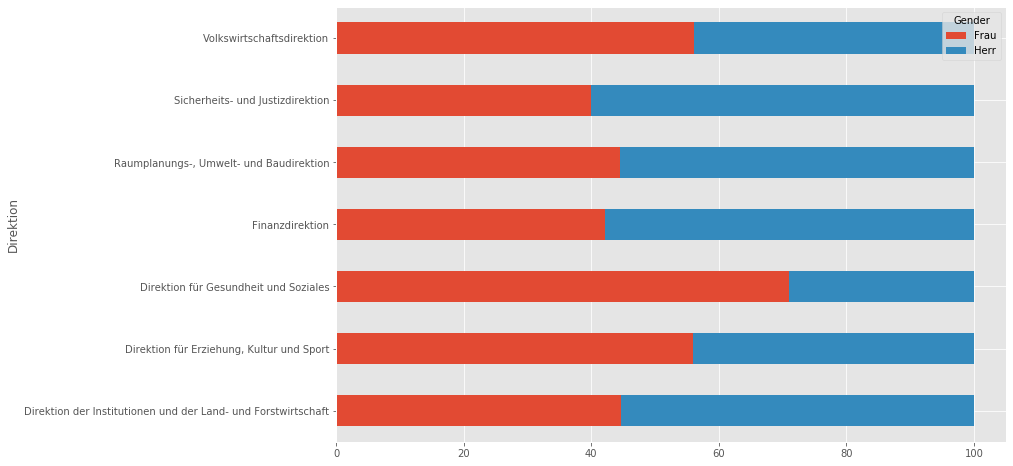

In [17]:
direktion_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='barh', stacked = 'True', figsize=(12, 8))

## Todo: 
* Nur bestimmte Werte aus Direktionen anzeigen [done]
* Kader gruppieren

## Kader Anteile

In [64]:
# Filter Nach Kader, .groupby Werte absolut

df[df['Kader'] == True].groupby('Direktion')['Gender'].value_counts().unstack()

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,16,56
"Direktion für Erziehung, Kultur und Sport",73,96
Direktion für Gesundheit und Soziales,12,15
Finanzdirektion,6,13
"Raumplanungs-, Umwelt- und Baudirektion",17,58
Sicherheits- und Justizdirektion,1,8
Volkswirtschaftsdirektion,20,28


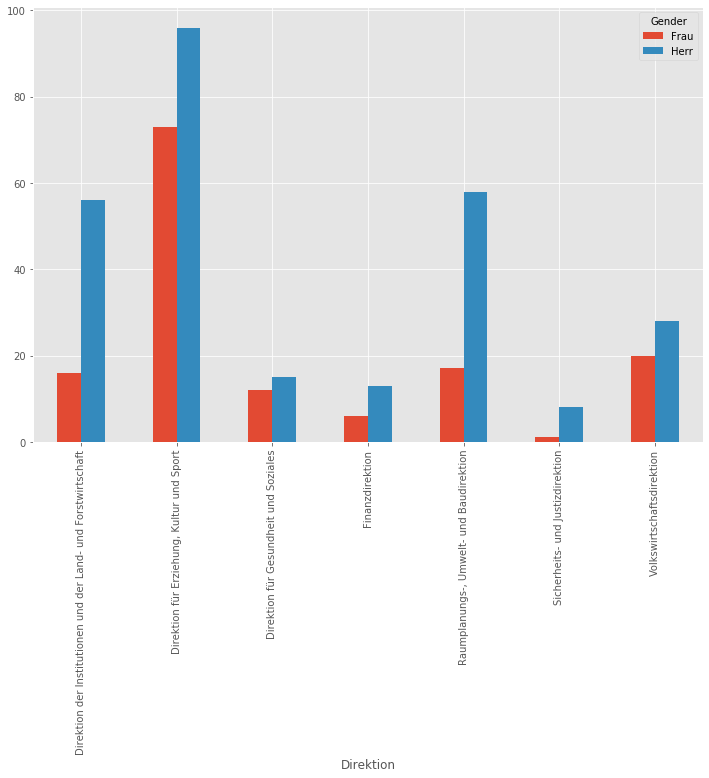

In [19]:
# Werte oben plotten

df[df['Kader'] == True].groupby('Direktion')['Gender'].value_counts().unstack().plot(kind='bar', figsize=(12, 8))

In [65]:
# Prozent Kader berechnen


direktion_kader = df[df['Kader'] == True].groupby('Direktion')['Gender'].value_counts()
direktion_kader.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,22.222222,77.777778
"Direktion für Erziehung, Kultur und Sport",43.195266,56.804734
Direktion für Gesundheit und Soziales,44.444444,55.555556
Finanzdirektion,31.578947,68.421053
"Raumplanungs-, Umwelt- und Baudirektion",22.666667,77.333333
Sicherheits- und Justizdirektion,11.111111,88.888889
Volkswirtschaftsdirektion,41.666667,58.333333


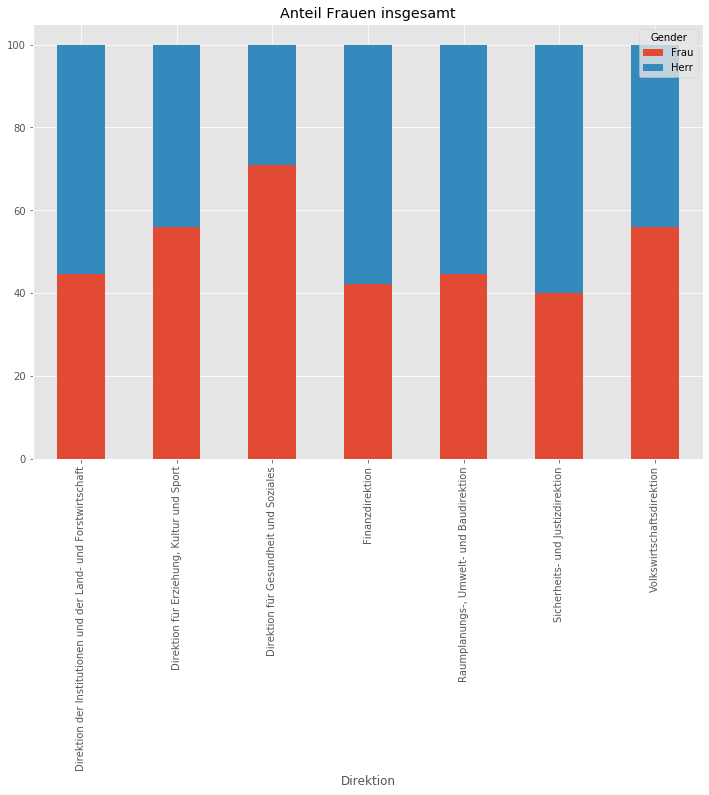

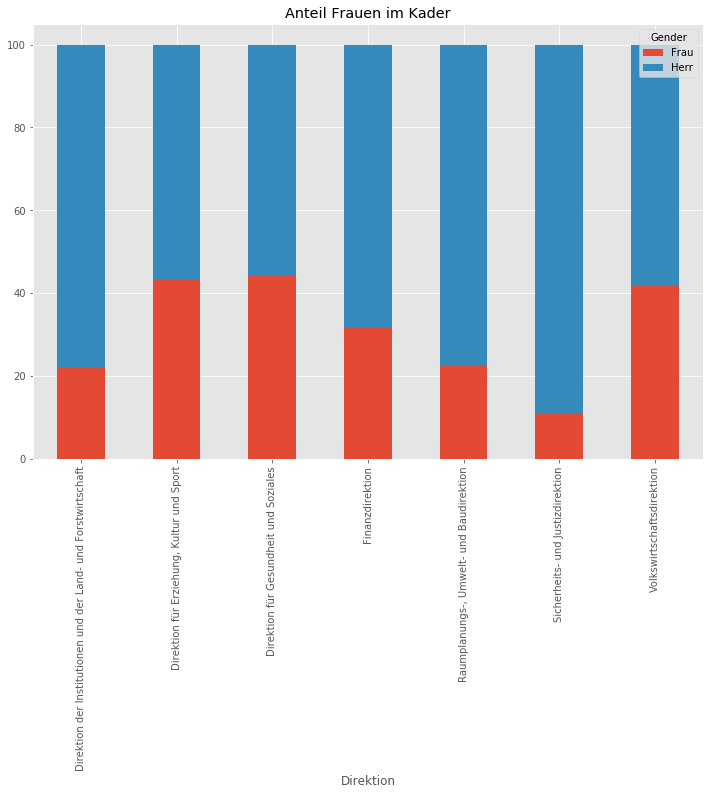

In [24]:
# Prozent Kader plotten
direktion_gender.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', stacked = 'True', title='Anteil Frauen insgesamt', figsize=(12, 8))
direktion_kader.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', stacked = 'True', title='Anteil Frauen im Kader', figsize=(12, 8))


In [22]:
# Zum gegenüberstellen noch einmal Prozent total


So, und jetzt hätte ich gerne die Balken von Kader und total in einer Grafik kombiniert. 


In [104]:
# Test stacking

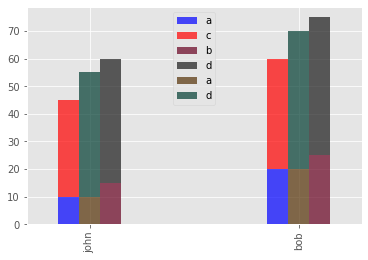

In [32]:
# Input von Stack Overflow zu plots verbinden:

df_t3 = pd.DataFrame({'a':[10, 20], 'b': [15, 25], 'c': [35, 40], 'd':[45, 50]}, index=['john', 'bob'])


fig, ax = plt.subplots()
df[['a', 'c']].plot.bar(stacked=True, width=0.1, position=1.5, colormap="bwr", ax=ax, alpha=0.7)
df[['b', 'd']].plot.bar(stacked=True, width=0.1, position=-0.5, colormap="RdGy", ax=ax, alpha=0.7)
df[['a', 'd']].plot.bar(stacked=True, width=0.1, position=0.5, colormap="BrBG", ax=ax, alpha=0.7)
plt.legend(loc="upper center")
plt.show()

In [54]:
df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100

Frau    51.065246
Herr    48.934754
Name: Gender, dtype: float64

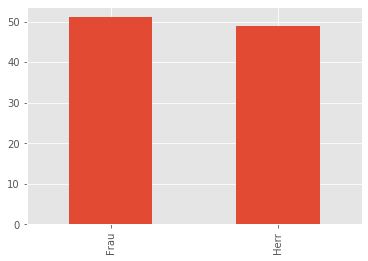

In [25]:

(df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100).plot(kind='bar')

In [ ]:
direktion_kader.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack().plot(kind='bar', stacked = 'True')

In [50]:

kader_absolut = df[df['Kader'] == True]['Gender'].value_counts()

kader_absolut 


Herr    274
Frau    145
Name: Gender, dtype: int64

In [53]:
(kader_absolut / kader_absolut.sum())*100

Herr    65.393795
Frau    34.606205
Name: Gender, dtype: float64

In [ ]:
(df['Gender'].value_counts() / df['Gender'].value_counts().sum()*100).plot(kind='bar')

In [72]:
# Prozent Kader Direktion

direktion_kader = df[df['Kader'] == True].groupby('Direktion')['Gender'].value_counts()
direktion_kader.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).unstack()

Gender,Frau,Herr
Direktion,,
Direktion der Institutionen und der Land- und Forstwirtschaft,22.222222,77.777778
"Direktion für Erziehung, Kultur und Sport",43.195266,56.804734
Direktion für Gesundheit und Soziales,44.444444,55.555556
Finanzdirektion,31.578947,68.421053
"Raumplanungs-, Umwelt- und Baudirektion",22.666667,77.333333
Sicherheits- und Justizdirektion,11.111111,88.888889
Volkswirtschaftsdirektion,41.666667,58.333333
